# Description

It analyzes how the CCC and MIC coefficients intersect on different gene pairs. This notebook is very similar to the [other notebook](https://github.com/greenelab/ccc/blob/coef_improvements/nbs/99_manuscript/coefs_comp/08_05-gtex_whole_blood-intersections_plots.ipynb) that compares CCC, Spearman and Pearson.

# Modules

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from upsetplot import plot, from_indicators

from ccc import conf

# Settings

In [2]:
DATASET_CONFIG = conf.GTEX
GTEX_TISSUE = "whole_blood"
GENE_SEL_STRATEGY = "var_pc_log2"

In [3]:
# this specificies the threshold to compare coefficients (see below).
# it basically takes the top Q_DIFF coefficient values for gene pairs
# and compare with the bottom Q_DIFF of the other coefficients
Q_DIFF = 0.30

# Paths

In [4]:
COMPARISONS_DIR = DATASET_CONFIG["RESULTS_DIR"] / "comparison_others"
display(COMPARISONS_DIR)

PosixPath('/opt/data/results/gtex_v8/comparison_others')

In [5]:
INPUT_CORR_FILE = (
    COMPARISONS_DIR / f"gtex_v8_data_{GTEX_TISSUE}-{GENE_SEL_STRATEGY}-all.pkl"
)
display(INPUT_CORR_FILE)

assert INPUT_CORR_FILE.exists()

PosixPath('/opt/data/results/gtex_v8/comparison_others/gtex_v8_data_whole_blood-var_pc_log2-all.pkl')

# Data

## Correlation

In [6]:
df = pd.read_pickle(INPUT_CORR_FILE)

In [7]:
df.shape

(12497500, 4)

In [8]:
df.head()

clustermatch   pearson  spearman  \
ENSG00000000419.12 ENSG00000002834.17      0.418721  0.681847  0.786595   
                   ENSG00000002919.14      0.405090  0.734699  0.816991   
                   ENSG00000002933.7       0.007466  0.013825  0.004128   
                   ENSG00000003402.19      0.391683  0.727347  0.803653   
                   ENSG00000004478.7       0.099013  0.094147  0.231269   

                                            mic  
ENSG00000000419.12 ENSG00000002834.17  0.569503  
                   ENSG00000002919.14  0.613696  
                   ENSG00000002933.7   0.146093  
                   ENSG00000003402.19  0.565137  
                   ENSG00000004478.7   0.253103

In [9]:
df.describe().applymap(str)

,clustermatch,pearson,spearman,mic
count,12497500.0,12497500.0,12497500.0,12497500.0
mean,0.14078162169144154,0.3055270339582277,0.39444206469877185,0.3002838899566396
std,0.14482154321798,0.24329624620596305,0.2595310853531984,0.14867474248467386
min,0.0,1.5077467052648785e-08,1.3941559573460438e-08,0.10742537802451597
25%,0.02840489656767938,0.09442322140732318,0.16297401304506182,0.1849714997405876
50%,0.0811105958507932,0.23886133272185917,0.3675595119633454,0.24598146535550708
75%,0.2167198284523933,0.4953853540480224,0.6148954029591087,0.38174801093096644
max,0.9169180125916612,0.9948779504715451,0.9867424080828916,0.999998734533167


In [10]:
# show quantiles
df.apply(lambda x: x.quantile(np.linspace(0.20, 1.0, 20)))

,clustermatch,pearson,spearman,mic
0.200000,0.022719,0.072940,0.128198,0.176306
0.242105,0.027466,0.090891,0.157408,0.183572
0.284211,0.032678,0.110196,0.187676,0.191264
0.326316,0.038882,0.131066,0.219424,0.199568
0.368421,0.046496,0.153705,0.253012,0.208732
0.410526,0.054956,0.178290,0.288341,0.219019
0.452632,0.065748,0.205194,0.324886,0.230711
0.494737,0.079110,0.234929,0.362750,0.244168
0.536842,0.094529,0.267921,0.401768,0.259657
0.578947,0.112897,0.304762,0.441738,0.277472


# Prepare data for plotting

In [11]:
def get_lower_upper_quantile(method_name, q):
    return df[method_name].quantile([q, 1 - q])

In [12]:
# test
_tmp = get_lower_upper_quantile("ccc", 0.20)
display(_tmp)

_tmp0, _tmp1 = _tmp
display((_tmp0, _tmp1))

assert _tmp0 == _tmp.iloc[0]
assert _tmp1 == _tmp.iloc[1]

0.2    0.022719
0.8    0.259050
Name: clustermatch, dtype: float64

(0.02271880444305697, 0.259049765543866)

In [13]:
clustermatch_lq, clustermatch_hq = get_lower_upper_quantile("ccc", Q_DIFF)
display((clustermatch_lq, clustermatch_hq))

pearson_lq, pearson_hq = get_lower_upper_quantile("pearson", Q_DIFF)
display((pearson_lq, pearson_hq))

spearman_lq, spearman_hq = get_lower_upper_quantile("spearman", Q_DIFF)
display((spearman_lq, spearman_hq))

mic_lq, mic_hq = get_lower_upper_quantile("mic", Q_DIFF)
display((mic_lq, mic_hq))

(0.034958339010692396, 0.18194034996376532)

(0.11783518340101658, 0.43471104354487755)

(0.1993565001342337, 0.5627397462227566)

(0.19428996608549465, 0.344984009069266)

In [14]:
pearson_higher = df["pearson"] >= pearson_hq
display(pearson_higher.sum())

pearson_lower = df["pearson"] <= pearson_lq
display(pearson_lower.sum())

3749250

3749250

In [15]:
spearman_higher = df["spearman"] >= spearman_hq
display(spearman_higher.sum())

spearman_lower = df["spearman"] <= spearman_lq
display(spearman_lower.sum())

3749250

3749250

In [16]:
clustermatch_higher = df["ccc"] >= clustermatch_hq
display(clustermatch_higher.sum())

clustermatch_lower = df["ccc"] <= clustermatch_lq
display(clustermatch_lower.sum())

3754664

3749265

In [17]:
mic_higher = df["mic"] >= mic_hq
display(mic_higher.sum())

mic_lower = df["mic"] <= mic_lq
display(mic_lower.sum())

3749250

3749250

**Question:** Why the number of top/bottom gene pairs in CCC does not match the rest? Maybe it's because there are repeated values. Let's see:

In [20]:
df.shape

(12497500, 4)

In [19]:
df["pearson"].unique().shape

(12497500,)

In [21]:
df["spearman"].unique().shape

(12496946,)

In [22]:
df["ccc"].unique().shape

(569372,)

In [23]:
df["mic"].unique().shape

(12497492,)

Yes, many CCC values are the same!

# UpSet plot

In [19]:
df_plot = pd.DataFrame(
    {
        "pearson_higher": pearson_higher,
        "pearson_lower": pearson_lower,
        "spearman_higher": spearman_higher,
        "spearman_lower": spearman_lower,
        "clustermatch_higher": clustermatch_higher,
        "clustermatch_lower": clustermatch_lower,
        "mic_higher": mic_higher,
        "mic_lower": mic_lower,
    }
)

In [20]:
df_plot = pd.concat([df_plot, df], axis=1)

In [21]:
df_plot

pearson_higher  pearson_lower  \
ENSG00000000419.12 ENSG00000002834.17            True          False   
                   ENSG00000002919.14            True          False   
                   ENSG00000002933.7            False           True   
                   ENSG00000003402.19            True          False   
                   ENSG00000004478.7            False           True   
...                                               ...            ...   
ENSG00000284574.1  ENSG00000282651.2            False           True   
                   ENSG00000282780.1            False           True   
                   ENSG00000282939.1            False           True   
                   ENSG00000283063.1            False           True   
                   ENSG00000283602.1            False           True   

                                       spearman_higher  spearman_lower  \
ENSG00000000419.12 ENSG00000002834.17             True           False   
                   ENSG00000002919.14             True           False   
                   ENSG00000002933.7             False            True   
                   ENSG00000003402.19             True           False   
                   ENSG00000004478.7             False           False   
...                                                ...             ...   
ENSG00000284574.1  ENSG00000282651.2             False            True   
                   ENSG00000282780.1             False            True   
                   ENSG00000282939.1             False            True   
                   ENSG00000283063.1             False            True   
                   ENSG00000283602.1             False            True   

                                       clustermatch_higher  \
ENSG00000000419.12 ENSG00000002834.17                 True   
                   ENSG00000002919.14                 True   
                   ENSG00000002933.7                 False   
                   ENSG00000003402.19                 True   
                   ENSG00000004478.7                 False   
...                                                    ...   
ENSG00000284574.1  ENSG00000282651.2                 False   
                   ENSG00000282780.1                 False   
                   ENSG00000282939.1                 False   
                   ENSG00000283063.1                 False   
                   ENSG00000283602.1                 False   

                                       clustermatch_lower  mic_higher  \
ENSG00000000419.12 ENSG00000002834.17               False        True   
                   ENSG00000002919.14               False        True   
                   ENSG00000002933.7                 True       False   
                   ENSG00000003402.19               False        True   
                   ENSG00000004478.7                False       False   
...                                                   ...         ...   
ENSG00000284574.1  ENSG00000282651.2                 True       False   
                   ENSG00000282780.1                 True       False   
                   ENSG00000282939.1                 True       False   
                   ENSG00000283063.1                 True       False   
                   ENSG00000283602.1                 True       False   

                                       mic_lower  clustermatch   pearson  \
ENSG00000000419.12 ENSG00000002834.17      False      0.418721  0.681847   
                   ENSG00000002919.14      False      0.405090  0.734699   
                   ENSG00000002933.7        True      0.007466  0.013825   
                   ENSG00000003402.19      False      0.391683  0.727347   
                   ENSG00000004478.7       False      0.099013  0.094147   
...                                          ...           ...       ...   
ENSG00000284574.1  ENSG00000282651.2        True      0.011968  0.051215   
                   ENSG00000282780.1        True      0

In [22]:
assert not df_plot.isna().any().any()

In [23]:
df_plot = df_plot.rename(
    columns={
        "pearson_higher": "Pearson (high)",
        "pearson_lower": "Pearson (low)",
        "spearman_higher": "Spearman (high)",
        "spearman_lower": "Spearman (low)",
        "clustermatch_higher": "CCC (high)",
        "clustermatch_lower": "CCC (low)",
        "mic_higher": "MIC (high)",
        "mic_lower": "MIC (low)",
    }
)

In [24]:
categories = sorted(
    [x for x in df_plot.columns if " (" in x],
    reverse=True,
    key=lambda x: x.split(" (")[1] + " (" + x.split(" (")[0],
)

In [25]:
categories

['Spearman (low)',
 'Pearson (low)',
 'MIC (low)',
 'CCC (low)',
 'Spearman (high)',
 'Pearson (high)',
 'MIC (high)',
 'CCC (high)']

## All subsets (original full plot)

In [26]:
df_r_data = df_plot

In [27]:
df_r_data.shape

(12497500, 12)

In [28]:
gene_pairs_by_cats = from_indicators(categories, data=df_r_data)

In [29]:
gene_pairs_by_cats

Pearson (high)  \
Spearman (low) Pearson (low) MIC (low) CCC (low) Spearman (high) Pearson (high) MIC (high) CCC (high)                   
False          False         False     False     True            True           True       True                  True   
                                                                                           True                  True   
True           True          True      True      False           False          False      False                False   
False          False         False     False     True            True           True       True                  True   
               True          False     False     False           False          False      False                False   
...                                                                                                               ...   
True           True          True      True      False           False          False      False                False   
                                                                                           False                False   
                                                                                           False                False   
                                                                                           False                False   
                                                                                           False                False   

                                                                                                       Pearson (low)  \
Spearman (low) Pearson (low) MIC (low) CCC (low) Spearman (high) Pearson (high) MIC (high) CCC (high)                  
False          False         False     False     True            True           True       True                False   
                                                                                           True                False   
True           True          True      True      False           False          False      False                True   
False          False         False     False     True            True           True       True                False   
               True          False     False     False           False          False      False                True   
...                                                                                                              ...   
True           True          True      True      False           False          False      False                True   
                                                                                           False                True   
                                                                                           False                True   
                                                                                           False                True   
                                                                                           False                True   

                                                                                                       Spearman (high)  \
Spearman (low) Pearson (low) MIC (low) CCC (low) Spearman (high) Pearson (high) MIC (high) CCC (high)                    
False          False         False     False     True            True           True       True                   True   
                                                                                           True                   True   
True           True          True      True      False           False          False      False                 False   
False          False         False     False     True            True           True       True                   True   
               True          False     False     False           False          False      False                 False   
...                                                                                                               

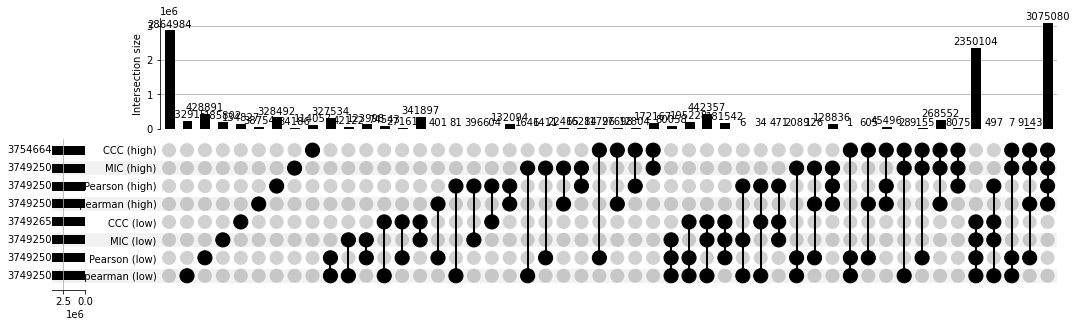

In [30]:
fig = plt.figure(figsize=(18, 5))

g = plot(
    gene_pairs_by_cats,
    show_counts=True,
    sort_categories_by=None,
    element_size=None,
    fig=fig,
)

There are no intersections (columns) where CCC is high/low and MIC is low/high. This indicates that both behave very similarly.

To make this more clear, below I only focus on MIC and CCC.

## Only CCC and MIC

In [33]:
categories = sorted(
    [x for x in df_plot.columns if " (" in x and ("CCC" in x or "MIC" in x)],
    reverse=True,
    key=lambda x: x.split(" (")[1] + " (" + x.split(" (")[0],
)

In [34]:
categories

['MIC (low)', 'CCC (low)', 'MIC (high)', 'CCC (high)']

In [35]:
df_r_data = df_plot

In [36]:
df_r_data.shape

(12497500, 12)

In [37]:
gene_pairs_by_cats = from_indicators(categories, data=df_r_data)

In [38]:
gene_pairs_by_cats

Pearson (high)  Pearson (low)  \
MIC (low) CCC (low) MIC (high) CCC (high)                                  
False     False     True       True                  True          False   
                               True                  True          False   
True      True      False      False                False           True   
False     False     True       True                  True          False   
                    False      False                False           True   
...                                                   ...            ...   
True      True      False      False                False           True   
                               False                False           True   
                               False                False           True   
                               False                False           True   
                               False                False           True   

                                           Spearman (high)  Spearman (low)  \
MIC (low) CCC (low) MIC (high) CCC (high)                                    
False     False     True       True                   True           False   
                               True                   True           False   
True      True      False      False                 False            True   
False     False     True       True                   True           False   
                    False      False                 False           False   
...                                                    ...             ...   
True      True      False      False                 False            True   
                               False                 False            True   
                               False                 False            True   
                               False                 False            True   
                               False                 False            True   

                                           CCC (high)  CCC (low)  MIC (high)  \
MIC (low) CCC (low) MIC (high) CCC (high)                                      
False     False     True       True              True      False        True   
                               True              True      False        True   
True      True      False      False            False       True       False   
False     False     True       True              True      False        True   
                    False      False            False      False       False   
...                                               ...        ...         ...   
True      True      False      False            False       True       False   
                               False            False       True       False   
                               False            False       True       False   
                               False            False       True       False   
                               False            False       True       False   

                                           MIC (low)  clustermatch   pearson  \
MIC (low) CCC (low) MIC (high) CCC (high)                                      
False     False     True       True            False      0.418721  0.681847   
                               True            False      0.405090  0.734699   
True      True      False      False            True      0.007466  0.013825   
False     False     True       True            False      0.391683  0.727347   
                    False      False           False      0.099013  0.094147   
...                                              ...           ...       ...   
True      True      False      False            True      0.011968  0.051215   
                               False            True      0.004975  0.031741   
                               False            True      0.011968  0.029699   
                               False            True      0.006638  0.033764   
                               False  

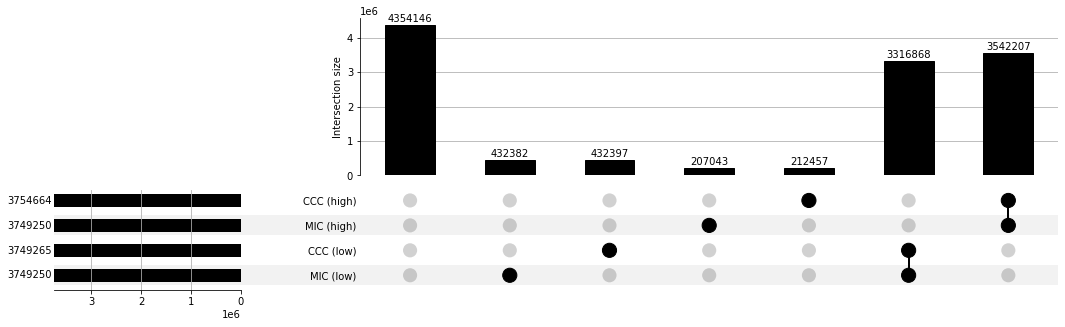

In [39]:
fig = plt.figure(figsize=(18, 5))

g = plot(
    gene_pairs_by_cats,
    show_counts=True,
    sort_categories_by=None,
    element_size=None,
    fig=fig,
)